In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
# #显示所有列
# pd.set_option('display.max_columns', None)
# #显示所有行
# pd.set_option('display.max_rows', None)

import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

from analysis import *

In [20]:
util = PermisionAnalysisUtil('../result/Video/')
# print('所有APK的所有权限*******************\n',util.permisions_df)
util.permisions_df.shape

(135, 10)

In [21]:
# print('\n权限列表*******************\n',util.get_permision_list(['chrome']))

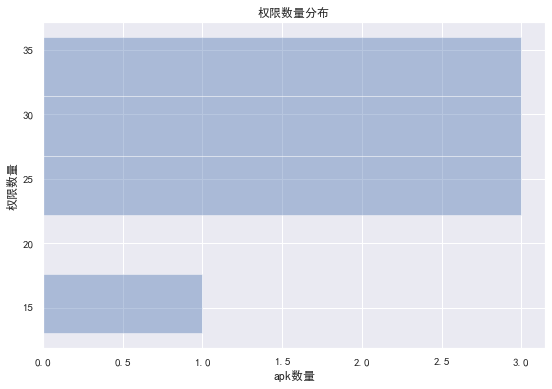

In [22]:
permision_num_df = util.get_permision_num()
# print('\n每一个APK的权限数量*******************\n',permision_num_df)
plt.figure(figsize=(9,6))
sns.distplot(a=permision_num_df,kde=False,vertical=True)
plt.xlabel('apk数量')
plt.ylabel('权限数量')
plt.title('权限数量分布')
plt.show()

In [23]:
# df = pd.DataFrame()
# for cat in ['Browser','Camera','Pay','Social','Video']:
#     util = PermisionAnalysisUtil(f'../result/{cat}/')
#     tmp = util.permisions_df.sum().sort_values(ascending=False)
#     df[cat] = tmp.index.values + '(' + np.array(tmp.values,dtype=np.str)+')'
# df

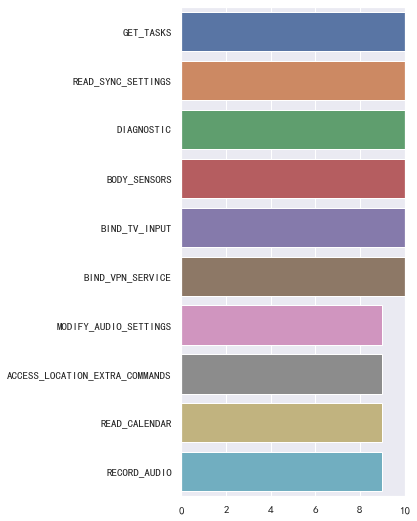

In [24]:
# print('\n需求最多的权限*******************\n',util.get_top_permision(top=135))
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
df = util.get_top_permision(top=10)
nums = df.values
fig = plt.figure(figsize=(4,9))
ax = sns.barplot(x=df.values,y=df.index.values)
plt.xlim([0,10])
plt.show()

In [25]:
# print('\n权限的解释说明*******************\n',util.get_permisions_description([i for i in range(2)],is_index=True))
print('\n权限的解释说明*******************\n')
tmp = util.get_permisions_description(list(df.index.values),is_index=False)
df = pd.DataFrame(data=tmp.values(),index=tmp.keys(),columns=['description'])
df['num'] = nums
df


权限的解释说明*******************



,description,num
GET_TASKS,允许一个程序获取信息有关当前或最近运行的任务，一个缩略的任务状态，是否活动等等,10
READ_SYNC_SETTINGS,允许程序读取同步设置，读取Google在线同步设置,10
DIAGNOSTIC,允许程序到RW到诊断资源,10
BODY_SENSORS,允许应用程序访问用户使用的传感器来测量他/她的身体内发生了什么，如心率仪,10
BIND_TV_INPUT,必须由TvInputService需要确保只有系统可以绑定到它,10
BIND_VPN_SERVICE,"绑定VPN服务必须通过VpnService服务来请求,只有系统才能用",10
MODIFY_AUDIO_SETTINGS,允许程序修改声音设置信息,9
ACCESS_LOCATION_EXTRA_COMMANDS,允许应用程序访问额外的位置提供命令,9
READ_CALENDAR,允许程序读取用户的日程信息,9
RECORD_AUDIO,允许程序录制声音通过手机或耳机的麦克,9


In [8]:
print('\n每个APK都需要的权限*******************\n')
df = util.get_permisions_all_have()
df


每个APK都需要的权限*******************



RECEIVE_BOOT_COMPLETED             10
DIAGNOSTIC                         10
BIND_NFC_SERVICE                   10
BIND_TELECOM_CONNECTION_SERVICE    10
WRITE_VOICEMAIL                    10
ACCESS_LOCATION_EXTRA_COMMANDS     10
BROADCAST_WAP_PUSH                 10
CAPTURE_SECURE_VIDEO_OUTPUT        10
dtype: int64

In [9]:
# print('APK权限的余弦相似度*******************\n',util.get_cosine_similarity(np.array(util.permisions_df).transpose()))
cos_sim=util.get_cosine_similarity(np.array(util.permisions_df).transpose())

In [10]:
# !python analysis.py

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5]),
 <a list of 50 Text xticklabel objects>)

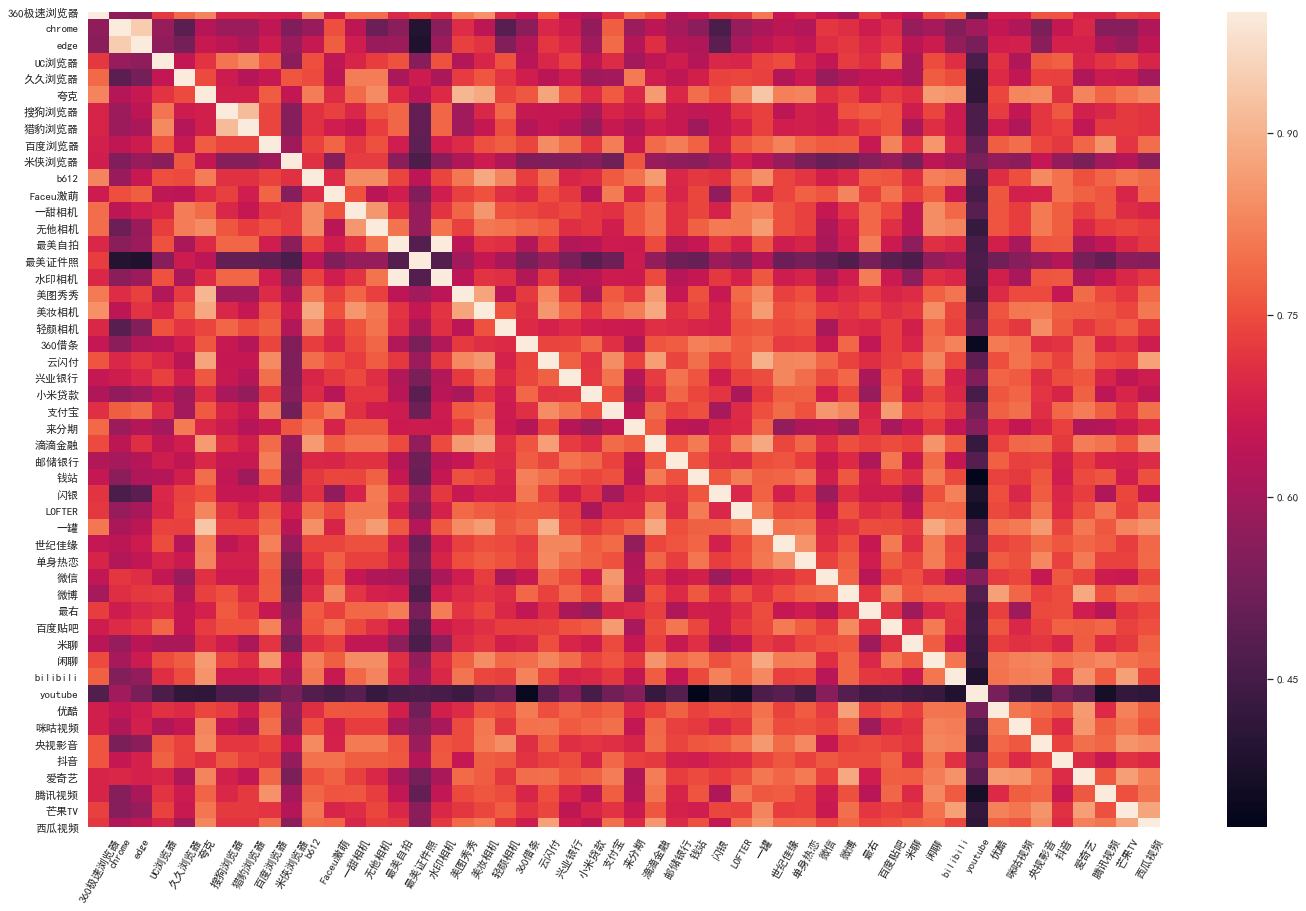

In [11]:
plt.figure(figsize=(24,15))
sns.heatmap(cos_sim['cos_sim'],xticklabels=util.permisions_df.columns,
           yticklabels=util.permisions_df.columns)
plt.xticks(rotation=60)

In [30]:
# import glob
# files = glob.glob("../result/*/*.txt")
# apk_map = {}
# for file in files:
#     cat = file.split('\\')[1]
#     name = file.split('\\')[2].split('.')[0]
#     if cat not in apk_map.keys():
#         apk_map[cat] = [name]
#     else:
#         apk_map[cat].append(name)
# apks_df = pd.DataFrame(apk_map)
# apks_df